In [3]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
# import pydot
from networkx.drawing.nx_pydot import graphviz_layout
from scipy.sparse.csgraph import laplacian
from graph_optimization import fdla_weights_symmetric, fmmc_weights, lmsc_weights, fastest_averaging_constant_weight, max_degree_weights, metropolis_hastings_weights

In [4]:
def generateP(A, kappa):
	dmax = np.max(np.sum(A, axis=0))
	L = laplacian(A, normed=False)
	M, _ = np.shape(A)
	I = np.eye(M)

	P = I - (kappa/dmax) * L

	return P, get_rho(P)

def get_rho(P):
	n = P.shape[0]
	_P = P - np.ones((n, n)) * (1/n)
	l = np.abs(np.linalg.eigvals(_P))
	l = l[1 - l > 1e-5]
	return np.max(l)

In [5]:
COLORS = [
	'tab:blue',
	'tab:orange',
	'tab:green',
	'tab:red',
	'tab:purple',
	'tab:brown',
	'tab:pink',
	'tab:gray',
	'tab:olive',
	'tab:cyan',
]

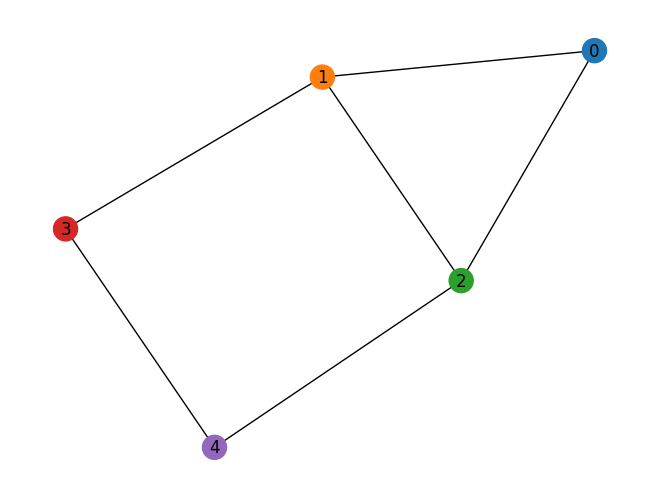

In [11]:
seeds = [80967431686, 29756843169]

# incidence_matrix = np.asarray(nx.linalg.graphmatrix.incidence_matrix(nx.from_numpy_array(adjacency_matrix), oriented=True).todense())

# # weight_matrix = np.array([
# # 	[0.75, 0.25, 0.00, 0.00],
# # 	[0.25, 0.25, 0.25, 0.25],
# # 	[0.00, 0.25, 0.50, 0.25],
# # 	[0.00, 0.25, 0.25, 0.50],
# # ])

# # weight_matrix = np.array([
# # 	[0.80, 0.00, 0.20, 0.00, 0.00],
# # 	[0.00, 0.80, 0.20, 0.00, 0.00],
# # 	[0.20, 0.20, 0.20, 0.20, 0.20],
# # 	[0.00, 0.00, 0.20, 0.60, 0.20],
# # 	[0.00, 0.00, 0.20, 0.20, 0.60],
# # ])

# _, _, weight_matrix, _ = max_degree_weights(incidence_matrix)
# weight_matrix = np.round(weight_matrix, 2)
# G = nx.from_numpy_array(weight_matrix, create_using=nx.DiGraph)
# G.remove_edges_from(nx.selfloop_edges(G))

# # print(nx.is_connected(G))
# nx.relabel_nodes(G, {idx: f'{idx + 1}: {weight_matrix[idx, idx]}' for idx in range(weight_matrix.shape[0])}, copy=False)
# pos = nx.spring_layout(G)
# # pos=nx.nx_pydot.graphviz_layout(G, prog='neato')
# nx.draw(G, node_color=COLORS[:G.number_of_nodes()], node_size=2000, edgecolors="black", pos=pos, with_labels=True)
# nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))


# house
A = np.array([
	[0, 1, 1, 0, 0],
	[1, 0, 1, 1, 0],
	[1, 1, 0, 0, 1],
	[0, 1, 0, 0, 1],
	[0, 0, 1, 1, 0],
])

G = nx.from_numpy_array(A)
nx.draw(G, node_color=COLORS[:G.number_of_nodes()], with_labels=True)
# save graph
np.save(f"data/saved_networks/house_adj.npy", nx.to_numpy_array(G))
np.save(f"data/saved_networks/house_inc.npy", np.asarray(nx.linalg.graphmatrix.incidence_matrix(G, oriented=True).todense()))
plt.savefig(f'data/img/networks/png/house.png', format='png')
plt.savefig(f'data/img/networks/svg/house.svg', format='svg')